In this notebook, we explore what happens when a power spectra is calculated over global and regional datasets that have NaN values, largely due to land.

In [1]:
from xgcm import Grid
import pop_tools
import gcsfs
import fsspec as fs
import numpy as np
import xesmf as xe
import xarray as xr
import random
import matplotlib.pyplot as plt
import warnings
from xgcm import Grid
import importlib
import preprocessing
import gcm_filters
import xrft

warnings.filterwarnings("ignore")

importlib.reload(preprocessing)
from preprocessing import preprocess_data
from gcm_filtering import filter_inputs_dataset
from gcm_filtering import filter_inputs

In [2]:
ds_merged = preprocess_data()
ds_merged

Load Data
Interpolating ocean velocities
Modify units
Load Data
Align in time
Interpolating ocean velocities
Regrid Atmospheric Data
Modify units
Mask nans
Calculate relative wind


<xarray.Dataset>
Dimensions:       (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
    dxt           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyt           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolat_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolon_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    ht            (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    kmt           (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    wet           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    area_t        (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [3]:
ds_in = ds_merged
ds_in = ds_in.drop(['area_t', 'dxt', 'dyt', 'geolat_t', 'geolon_t', 'ht', 'kmt', 'wet'])
ds_in

<xarray.Dataset>
Dimensions:       (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

# Regional Case 

In [4]:
x_min, x_max = 700, 1300
y_min, y_max = 1500, 1800
ds_in = ds_in.isel(time=-1).isel(yt_ocean=slice(y_min, y_max), xt_ocean=slice(x_min, x_max))
ds_in

<xarray.Dataset>
Dimensions:       (yt_ocean: 300, xt_ocean: 600)
Coordinates:
    time          object 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -209.9 -209.8 -209.7 ... -150.2 -150.1
  * yt_ocean      (yt_ocean) float64 24.74 24.83 24.92 ... 48.26 48.33 48.39
Data variables:
    slp           (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    t_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    q_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    wind          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    rh_ref        (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    surface_temp  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_ocean       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_ocean       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_relative    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_relative    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

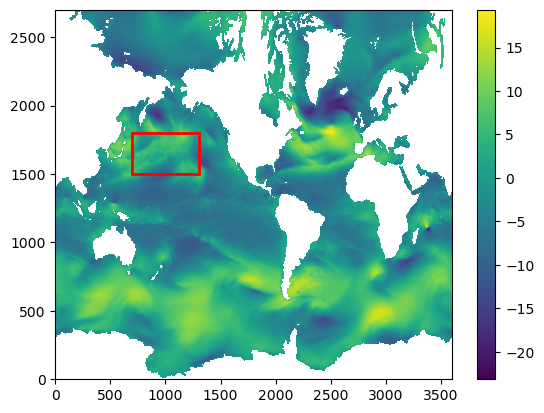

In [29]:
# Extract the data for the specific region
data = ds_merged.u_ref.isel(time=0)

# Plot the data using pcolor
plt.pcolor(data, cmap='viridis')

# Draw a rectangle around the region (the coordinates are based on the index positions)
rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect)  # Add the rectangle to the current axes

# Show the plot
plt.colorbar()
plt.show()


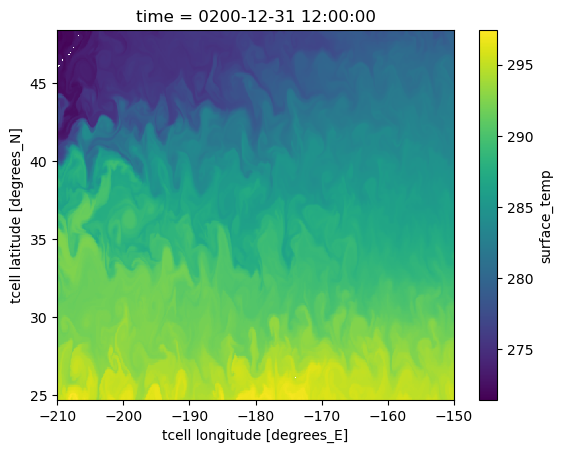

In [9]:
ds_in.surface_temp.plot()

### Check for NaNs

In [75]:
nan_count = ds_in.isnull().sum().compute()
print("Here is how many NaNs we have for each variable.")
print(nan_count)
print("Approximately", 17/(300*600)*100, "% of data is NaNs")

Here is how many NaNs we have for each variable.
<xarray.Dataset>
Dimensions:       ()
Coordinates:
    time          object 0200-12-31 12:00:00
Data variables:
    slp           int64 17
    v_ref         int64 17
    u_ref         int64 17
    t_ref         int64 17
    q_ref         int64 17
    wind          int64 17
    rh_ref        int64 17
    surface_temp  int64 17
    u_ocean       int64 17
    v_ocean       int64 17
    u_relative    int64 17
    v_relative    int64 17
Approximately 0.009444444444444445 % of data is NaNs


## Power Spectra with NaNs

In [30]:
temp_filt = filter_inputs_dataset(ds_in, ['yt_ocean', 'xt_ocean'], filter_scale=50, filter_type='gaussian')
temp_filt

<xarray.Dataset>
Dimensions:       (xt_ocean: 600, yt_ocean: 300)
Coordinates:
    time          object 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -209.9 -209.8 -209.7 ... -150.2 -150.1
  * yt_ocean      (yt_ocean) float64 24.74 24.83 24.92 ... 48.26 48.33 48.39
Data variables:
    slp           (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    t_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    q_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    wind          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    rh_ref        (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    surface_temp  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_ocean       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_ocean       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_relative    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_relative    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
Attributes:
    filter_scale:  50
    filter_type:   gaussian

In [33]:
temp_ps = xrft.power_spectrum(ds_in.surface_temp, dim=['xt_ocean'], window=True)
temp_ps

<xarray.DataArray 'rechunk-merge-d2af901f4d7e779d533c4f250a32a0c1' (
                                                                    yt_ocean: 300,
                                                                    freq_xt_ocean: 600)>
dask.array<mul, shape=(300, 600), dtype=float64, chunksize=(300, 600), chunktype=numpy.ndarray>
Coordinates:
    time           object 0200-12-31 12:00:00
  * yt_ocean       (yt_ocean) float64 24.74 24.83 24.92 ... 48.26 48.33 48.39
  * freq_xt_ocean  (freq_xt_ocean) float64 -5.0 -4.983 -4.967 ... 4.967 4.983

In [34]:
temp_filt_ps = xrft.power_spectrum(temp_filt.surface_temp, dim=['xt_ocean'], window=True)
temp_filt_ps

<xarray.DataArray 'rechunk-merge-d5bdfbb141d120ee408f6cfe278d5336' (
                                                                    yt_ocean: 300,
                                                                    freq_xt_ocean: 600)>
dask.array<mul, shape=(300, 600), dtype=float64, chunksize=(300, 600), chunktype=numpy.ndarray>
Coordinates:
    time           object 0200-12-31 12:00:00
  * yt_ocean       (yt_ocean) float64 24.74 24.83 24.92 ... 48.26 48.33 48.39
  * freq_xt_ocean  (freq_xt_ocean) float64 -5.0 -4.983 -4.967 ... 4.967 4.983

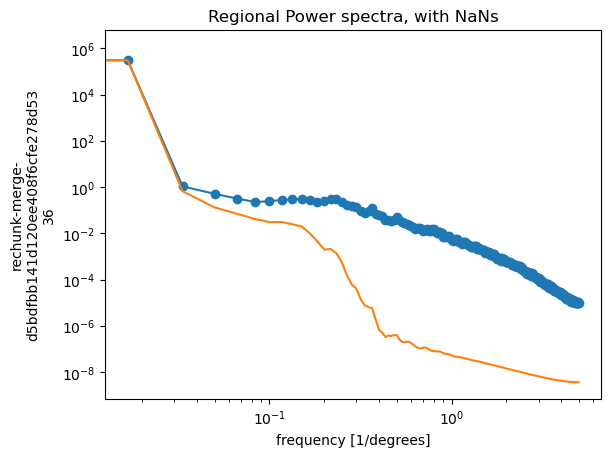

In [55]:
temp_ps.mean('yt_ocean').plot(marker='o')
temp_filt_ps.mean('yt_ocean').plot()
plt.title("Regional Power spectra, with NaNs")
plt.xlabel("frequency [1/degrees]")
plt.xscale('log')
plt.yscale('log')

We see the expected dropoff for the filtered power spectra! Perhaps the NaNs haven't altered the expected power spectra behavior? This may be because we only had 17 NaN values out of 600x300 values per data variable.

## Power Spectra without NaNs (Linear Interpolation)
We interpolate to fill the NaN values with a reasonable number based on the ocean around it

In [44]:
ds_interp = ds_in.interpolate_na(dim='xt_ocean', method='linear').interpolate_na(dim='yt_ocean', method='linear')
ds_interp

<xarray.Dataset>
Dimensions:       (xt_ocean: 600, yt_ocean: 300)
Coordinates:
    time          object 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -209.9 -209.8 -209.7 ... -150.2 -150.1
  * yt_ocean      (yt_ocean) float64 24.74 24.83 24.92 ... 48.26 48.33 48.39
Data variables:
    slp           (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    t_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    q_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    wind          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    rh_ref        (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    surface_temp  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_ocean       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_ocean       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_relative    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_relative    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [46]:
nan_count = ds_interp.isnull().sum().compute()
print("Here is how many NaNs we have for each variable.")
print(nan_count)
print("We have successfully interpolated over all NaNs!")

Here is how many NaNs we have for each variable.
<xarray.Dataset>
Dimensions:       ()
Coordinates:
    time          object 0200-12-31 12:00:00
Data variables:
    slp           int64 0
    v_ref         int64 0
    u_ref         int64 0
    t_ref         int64 0
    q_ref         int64 0
    wind          int64 0
    rh_ref        int64 0
    surface_temp  int64 0
    u_ocean       int64 0
    v_ocean       int64 0
    u_relative    int64 0
    v_relative    int64 0
We have successfully interpolated over all NaNs!


In [51]:
temp_filt_interp = filter_inputs_dataset(ds_interp, ['yt_ocean', 'xt_ocean'], filter_scale=50, filter_type='gaussian')
temp_ps_interp = xrft.power_spectrum(ds_interp.surface_temp, dim=['xt_ocean'], window=True)
temp_filt_ps_interp = xrft.power_spectrum(temp_filt_interp.surface_temp, dim=['xt_ocean'], window=True)

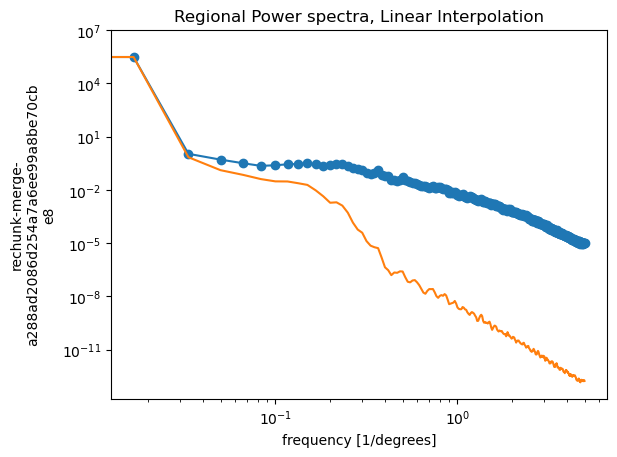

In [56]:
temp_ps_interp.mean('yt_ocean').plot(marker='o')
temp_filt_ps_interp.mean('yt_ocean').plot()
plt.title("Regional Power spectra, Linear Interpolation")
plt.xlabel("frequency [1/degrees]")
plt.xscale('log')
plt.yscale('log')

This dropoff is less prominent than for the case where we kept the NaNs. Linear interpolation may not be the best way to deal with NaNs. Let's try another NaN-removal method, and compare results

## Power Spectra without NaNs (Replace NaNs with zeros)
We interpolate to fill the NaN values with a reasonable number based on the ocean around it

In [63]:
ds_filled = ds_in.fillna(0)  # Replace NaNs with 0
ds_filled

<xarray.Dataset>
Dimensions:       (yt_ocean: 300, xt_ocean: 600)
Coordinates:
    time          object 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -209.9 -209.8 -209.7 ... -150.2 -150.1
  * yt_ocean      (yt_ocean) float64 24.74 24.83 24.92 ... 48.26 48.33 48.39
Data variables:
    slp           (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    t_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    q_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    wind          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    rh_ref        (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    surface_temp  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_ocean       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_ocean       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_relative    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_relative    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [65]:
nan_count = ds_filled.isnull().sum().compute()
print("Here is how many NaNs we have for each variable.")
print(nan_count)
print("We have successfully filled all NaNs!")

Here is how many NaNs we have for each variable.
<xarray.Dataset>
Dimensions:       ()
Coordinates:
    time          object 0200-12-31 12:00:00
Data variables:
    slp           int64 0
    v_ref         int64 0
    u_ref         int64 0
    t_ref         int64 0
    q_ref         int64 0
    wind          int64 0
    rh_ref        int64 0
    surface_temp  int64 0
    u_ocean       int64 0
    v_ocean       int64 0
    u_relative    int64 0
    v_relative    int64 0
We have successfully filled all NaNs!


In [67]:
temp_filt_filled = filter_inputs_dataset(ds_filled, ['yt_ocean', 'xt_ocean'], filter_scale=50, filter_type='gaussian')
temp_ps_filled = xrft.power_spectrum(ds_filled.surface_temp, dim=['xt_ocean'], window=True)
temp_filt_ps_filled = xrft.power_spectrum(temp_filt_filled.surface_temp, dim=['xt_ocean'], window=True)

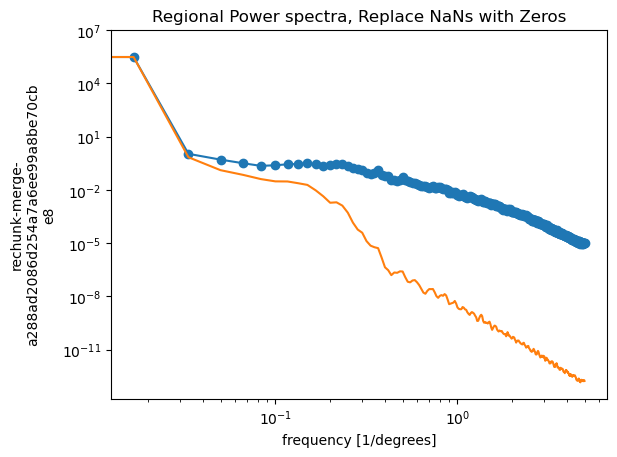

In [69]:
temp_ps_interp.mean('yt_ocean').plot(marker='o')
temp_filt_ps_interp.mean('yt_ocean').plot()
plt.title("Regional Power spectra, Replace NaNs with Zeros")
plt.xlabel("frequency [1/degrees]")
plt.xscale('log')
plt.yscale('log')

Once again, the dropoff here isn't as steep as in the case where we kept the NaNs. Perhaps filling the NaNs with zeros is also not the correct method

# Global Case 

In [77]:
ds_global = ds_merged.isel(time=0)
ds_global = ds_global.drop(['dxt', 'dyt', 'geolat_t', 'geolon_t', 'ht', 'kmt', 'wet', 'area_t'])
ds_global

<xarray.Dataset>
Dimensions:       (yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
    time          object 0181-01-01 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    slp           (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    v_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    u_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    t_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    q_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    wind          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    rh_ref        (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    surface_temp  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    u_ocean       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    v_ocean       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    u_relative    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    v_relative    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

### Check for NaNs

In [78]:
nan_count = ds_global.isnull().sum().compute()
print("Here is how many NaNs we have for each variable.")
print(nan_count)
print("Approximately", 3597028/(3600*2700)*100, "% of the data is NaNs")

Here is how many NaNs we have for each variable.
<xarray.Dataset>
Dimensions:       ()
Coordinates:
    time          object 0181-01-01 12:00:00
Data variables:
    slp           int64 3597028
    v_ref         int64 3597028
    u_ref         int64 3597028
    t_ref         int64 3597028
    q_ref         int64 3597028
    wind          int64 3597028
    rh_ref        int64 3597028
    surface_temp  int64 3597028
    u_ocean       int64 3597028
    v_ocean       int64 3597028
    u_relative    int64 3597028
    v_relative    int64 3597028
Approximately 37.00646090534979 % of the data is NaNs


Almost 40% of the data is NaNs! This is likely due to land. This makes computing global power spectra very difficult.

In [79]:
temp_filt_global = filter_inputs_dataset(ds_global, ['yt_ocean', 'xt_ocean'], filter_scale=50, filter_type='gaussian')
temp_ps_global = xrft.power_spectrum(ds_global.surface_temp, dim=['xt_ocean'], window=True)
temp_filt_ps_global = xrft.power_spectrum(temp_filt_global.surface_temp, dim=['xt_ocean'], window=True)

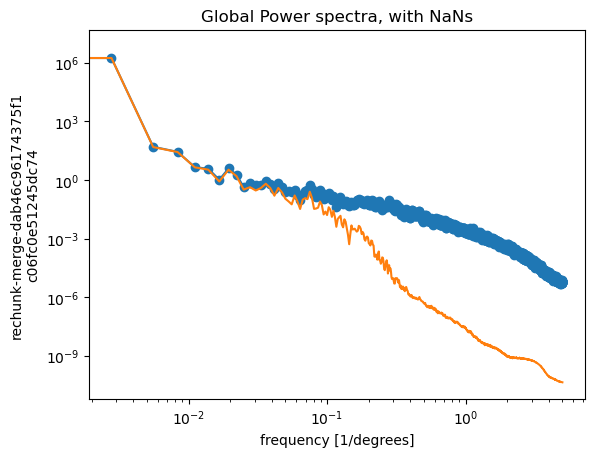

In [80]:
temp_ps_global.mean('yt_ocean').plot(marker='o')
temp_filt_ps_global.mean('yt_ocean').plot()
plt.title("Global Power spectra, with NaNs")
plt.xlabel("frequency [1/degrees]")
plt.xscale('log')
plt.yscale('log')

We do see a dropoff for the filtered power spectra, but it is not as steep as we expect it to be. This is likely because of the NaNs that account for land. Global power spectra are difficult to compute, and the power spectra computed will differ based off how NaN values are handled. How should we proceed in calculating global power spectra? Should we only stick to computing power spectra regionally? 